In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import cartopy.crs as ccrs
import regionmask

In [4]:
ds = xr.open_dataset('/home/alonsor/predictia_projects/data/pr_1980-2015_Winter.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 144)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-28 11:17:48 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
dr = ds['tp']

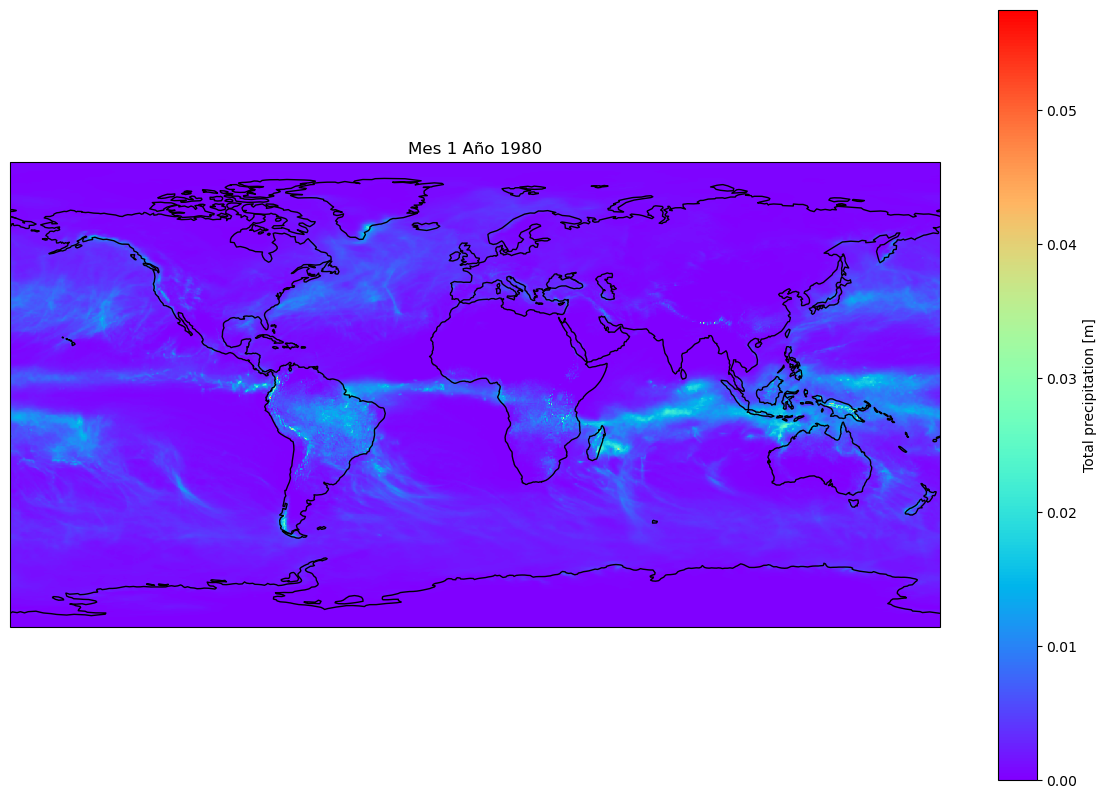

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, cmap='rainbow')
ax.coastlines()
k = 0
plt.title('Mes ' + str(dr.isel(time=k).time.dt.month.values) + ' Año ' + str(dr.isel(time=k).time.dt.year.values))
plt.gcf().set_size_inches(15, 10)


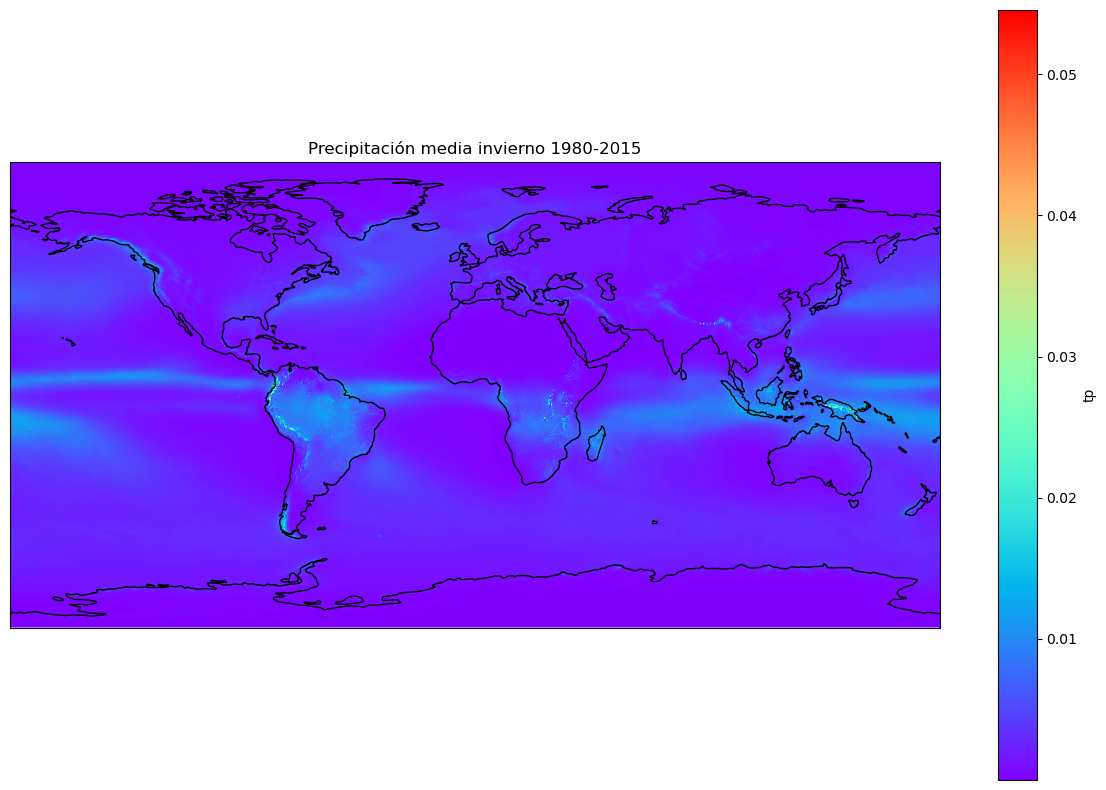

In [11]:
dr_mean = dr.mean(dim='time')
ax = plt.axes(projection=ccrs.PlateCarree())
dr_mean.plot.pcolormesh(ax=ax, cmap='rainbow')
ax.coastlines()
plt.title('Precipitación media invierno 1980-2015')
plt.gcf().set_size_inches(15, 10)

In [13]:
ar6 = regionmask.defined_regions.ar6.all
mask = ar6.mask(ds['longitude'], ds['latitude'])
region_masked = dr.where(mask == 19)
mean_pr = region_masked.mean(dim = 'time')

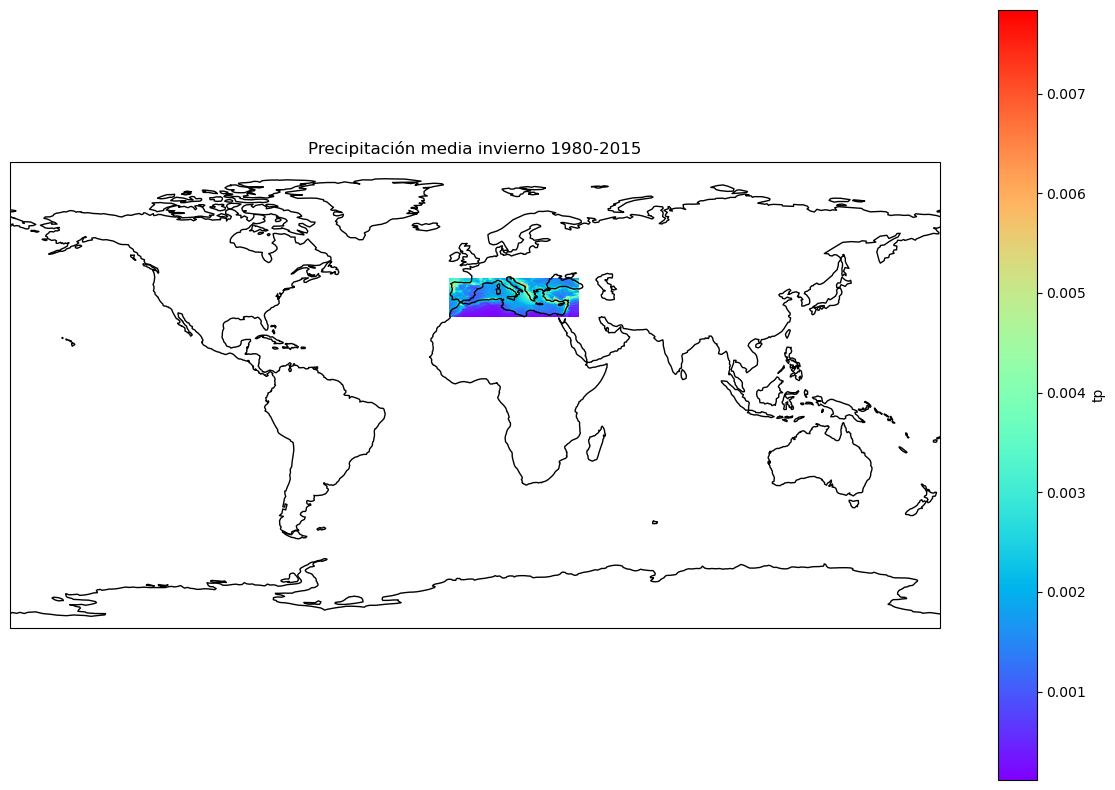

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())
mean_pr.plot.pcolormesh(ax=ax , cmap='rainbow')
ax.coastlines()
plt.title('Precipitación media invierno 1980-2015')
plt.gcf().set_size_inches(15, 10)